<a href="https://colab.research.google.com/github/erfanera/SlumImprovment/blob/main/OSM_Test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
!pip install osmnx geopandas matplotlib networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 2.2 MB/s eta 0:00:00


In [2]:
import geopandas
import matplotlib.pyplot as plt
import osmnx
import seaborn as sns
import networkx as nx
import pandas as pd
from shapely.geometry import Point, LineString



# Steps

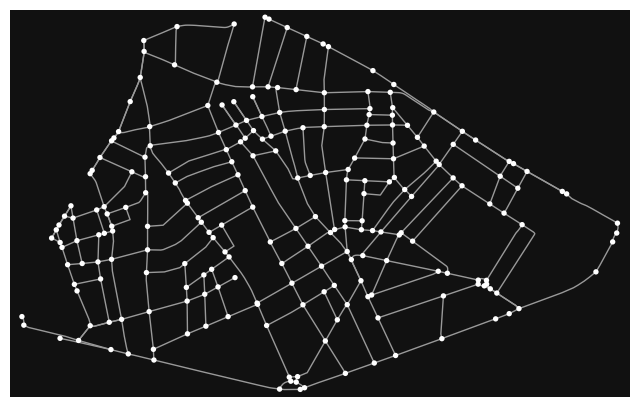

In [ ]:
# Configure OSMnx
ox.settings.use_cache = True
ox.settings.log_console = True

# Define the location
place_name = "Embajadores, Madrid, Spain"
sns.set_style(style="dark")
figure, ax = osmnx.plot_graph(graph)

<ipython-input-37-4b281877e47d>:22: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if facility.geometry.type == 'Polygon':
<ipython-input-37-4b281877e47d>:22: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if facility.geometry.type == 'Polygon':
<ipython-input-37-4b281877e47d>:22: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if facility.geometry.type == 'Polygon':
<ipython-input-37-4b281877e47d>:22: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if facility.geometry.type == 'Polygon':
<ipython-input-37-4b281877e47d>:22: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will 

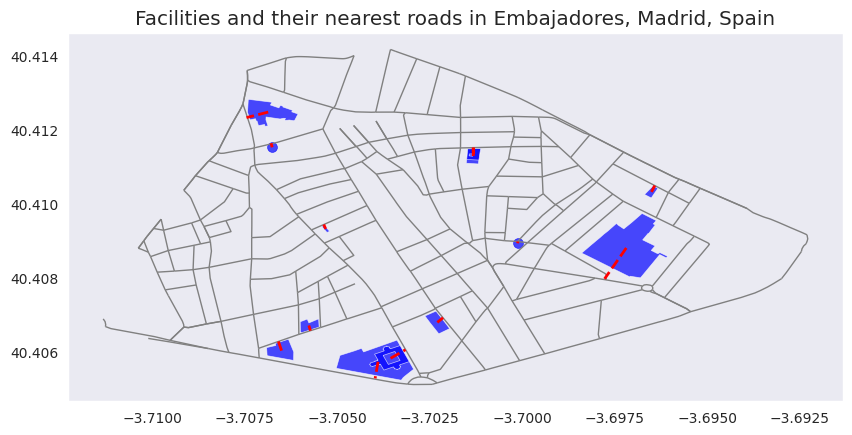

In [ ]:
# Retrieve the street network from the specified location
graph = ox.graph_from_place(place_name, network_type='drive')
nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)

# Retrieve facilities at the specified location
tags = {'amenity': ['school', 'hospital']}
facilities = ox.features_from_place(place_name, tags)

# Convert facilities to the same CRS as graph
facilities = facilities.to_crs(edges.crs)

# Plot settings
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=1, edgecolor='grey')

# Plot facilities
facilities.plot(ax=ax, color='blue', alpha=0.7, markersize=50)

# Function to plot nearest edge line
def plot_nearest_edge(facility, ax):
    # Calculate the centroid of the facility if it's a polygon
    if facility.geometry.type == 'Polygon':
        centroid = facility.geometry.centroid
    else:
        centroid = facility.geometry

    # Find the nearest edge to the centroid
    nearest_edge = ox.distance.nearest_edges(graph, centroid.x, centroid.y)
    # Extract nodes for this edge
    u, v, key = nearest_edge
    node_start = nodes.loc[u].geometry
    node_end = nodes.loc[v].geometry
    line = LineString([node_start, node_end])

    # Draw a line from facility to the road
    line_to_edge = LineString([centroid, line.interpolate(line.project(centroid))])
    gpd.GeoSeries([line_to_edge]).plot(ax=ax, color='red', linestyle='--', linewidth=2)

# Apply function to each facility
for idx, facility in facilities.iterrows():
    plot_nearest_edge(facility, ax)

ax.set_title('Facilities and their nearest roads in ' + place_name)
plt.show()


In [ ]:
# 定义地点
place_name = "Embajadores, Madrid, Spain"

# 提取特定便民设施（学校和医院）
tags = {'amenity': ['school', 'hospital']}
facilities = ox.geometries_from_place(place_name, tags)

# 提取有用的信息，如名称、类型和几何中心点坐标
facilities['centroid'] = facilities.geometry.centroid  # 计算几何中心点
facilities_info = facilities[['name', 'amenity', 'centroid']].copy()  # 创建信息表

# 处理缺失的名称信息
facilities_info['name'] = facilities_info['name'].fillna('Not available')

# 提取坐标
facilities_info['coordinates'] = facilities_info['centroid'].apply(lambda x: (x.x, x.y))

# 选择显示的列
facilities_info = facilities_info[['name', 'amenity', 'coordinates']]

# 转换为 Pandas DataFrame 并显示为表格
facilities_df = pd.DataFrame(facilities_info)
facilities_df = facilities_df.rename(columns={"name": "Name", "amenity": "Type", "coordinates": "Coordinates"})

# 显示表格
facilities_df


<ipython-input-45-772032d02ffd>:9: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  facilities = ox.geometries_from_place(place_name, tags)
<ipython-input-45-772032d02ffd>:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  facilities['centroid'] = facilities.geometry.centroid  # 计算几何中心点


Name  \
element_type osmid                                                           
node         266168383                      Antiguo Centro de Estudios Sol   
             1572572778                                      Diagonal;UNED   
way          29046209          Instituto de Educación Secundaria Cervantes   
             29046215    Colegio de Educación Infantil y Primaria Santa...   
             48761440    Colegio de Educación Infantil y Primaria Emili...   
             242790437   Centro Privado de Educación Infantil, Primaria...   
             313111534   Centro Privado de Educación Infantil, Primaria...   
             328689526   Centro Privado de Educación Infantil y Primari...   
             330451570   Centro Privado de Educación Infantil y Primari...   
             376299410                                       Not available   
             1182711445       Instituto de Educación Secundaria San Isidro   
relation     1223081                                         Not available   
             4612407     Colegio de Educación Infantil y Primaria Anton...   

                           Type                                Coordinates  
element_type osmid                                                          
node         266168383   school                   (-3.7067618, 40.4115325)  
             1572572778  school                   (-3.7001243, 40.4089371)  
way          29046209    school    (-3.7038983283617073, 40.4057349321188)  
             29046215    school  (-3.7065076066616625, 40.406033961909536)  
             48761440    school    (-3.705770982585175, 40.40671492186829)  
             242790437   school   (-3.6971862202555346, 40.40881033213895)  
             313111534   school  (-3.7022963389200094, 40.406797925038255)  
             328689526   school    (-3.696504745516492, 40.41032639257718)  
             330451570   school    (-3.705314363042521, 40.40932486414616)  
             376299410   school  (-3.7013227814372276, 40.411295968104305)  
             1182711445  school    (-3.706869661861194, 40.41248507326348)  
relation     1223081     school    (-3.703560353014202, 40.40582690858468)  
             4612407     school   (-3.7013118033158694, 40.41134791510035)

# The final code for school to front road

Error retrieving hospitals: No data elements in server response. Check log and query location/tags.
                                                                      name  \
element_type osmid                                                           
node         266168383                      Antiguo Centro de Estudios Sol   
             1572572778                                      Diagonal;UNED   
way          29046209          Instituto de Educación Secundaria Cervantes   
             29046215    Colegio de Educación Infantil y Primaria Santa...   
             48761440    Colegio de Educación Infantil y Primaria Emili...   

                        amenity  \
element_type osmid                
node         266168383   school   
             1572572778  school   
way          29046209    school   
             29046215    school   
             48761440    school   

                                                                  geometry  
element_type osmid            

<ipython-input-55-585d56f92f27>:44: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if facility.geometry.type == 'Polygon':
<ipython-input-55-585d56f92f27>:44: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if facility.geometry.type == 'Polygon':
<ipython-input-55-585d56f92f27>:44: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if facility.geometry.type == 'Polygon':
<ipython-input-55-585d56f92f27>:44: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if facility.geometry.type == 'Polygon':
<ipython-input-55-585d56f92f27>:44: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will 

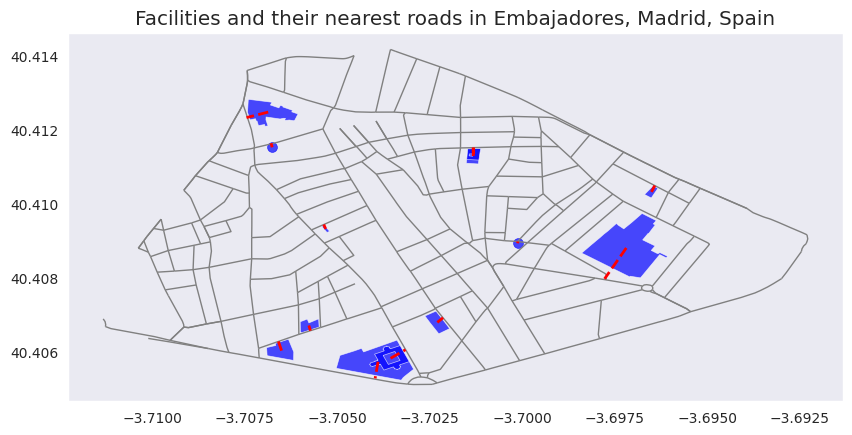

<ipython-input-55-585d56f92f27>:69: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  facilities['centroid'] = facilities.geometry.centroid  # 计算几何中心点


Name  \
element_type osmid                                                           
node         266168383                      Antiguo Centro de Estudios Sol   
             1572572778                                      Diagonal;UNED   
way          29046209          Instituto de Educación Secundaria Cervantes   
             29046215    Colegio de Educación Infantil y Primaria Santa...   
             48761440    Colegio de Educación Infantil y Primaria Emili...   
             242790437   Centro Privado de Educación Infantil, Primaria...   
             313111534   Centro Privado de Educación Infantil, Primaria...   
             328689526   Centro Privado de Educación Infantil y Primari...   
             330451570   Centro Privado de Educación Infantil y Primari...   
             376299410                                       Not available   
             1182711445       Instituto de Educación Secundaria San Isidro   
relation     1223081                                         Not available   
             4612407     Colegio de Educación Infantil y Primaria Anton...   

                           Type                                Coordinates  
element_type osmid                                                          
node         266168383   school                   (-3.7067618, 40.4115325)  
             1572572778  school                   (-3.7001243, 40.4089371)  
way          29046209    school    (-3.7038983283617073, 40.4057349321188)  
             29046215    school  (-3.7065076066616625, 40.406033961909536)  
             48761440    school    (-3.705770982585175, 40.40671492186829)  
             242790437   school   (-3.6971862202555346, 40.40881033213895)  
             313111534   school  (-3.7022963389200094, 40.406797925038255)  
             328689526   school    (-3.696504745516492, 40.41032639257718)  
             330451570   school    (-3.705314363042521, 40.40932486414616)  
             376299410   school  (-3.7013227814372276, 40.411295968104305)  
             1182711445  school    (-3.706869661861194, 40.41248507326348)  
relation     1223081     school    (-3.703560353014202, 40.40582690858468)  
             4612407     school   (-3.7013118033158694, 40.41134791510035)

In [ ]:
# Define the location
place_name = "Embajadores, Madrid, Spain"

# Retrieve the street network from the specified location
graph = ox.graph_from_place(place_name, network_type='drive')
nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)

# Retrieve buildings, schools, and hospitals separately using the updated functions
buildings = ox.features_from_place(place_name, {"building": True})
schools = ox.features_from_place(place_name, {"amenity": "school"})

# Try to retrieve hospitals and handle cases where no hospitals are found
try:
    hospitals = ox.features_from_place(place_name, {"amenity": "hospital"})
except Exception as e:
    print(f"Error retrieving hospitals: {e}")
    hospitals = gpd.GeoDataFrame()  # create an empty GeoDataFrame if no hospitals are found

# Combine all facilities into one GeoDataFrame
facilities = pd.concat([schools, hospitals])

# Print the combined facilities to check the data
print(facilities[['name', 'amenity', 'geometry']].head())

# Convert facilities to the same CRS as graph
facilities = facilities.to_crs(edges.crs)

# Plot settings
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=1, edgecolor='grey')

# Plot facilities
facilities.plot(ax=ax, color='blue', alpha=0.7, markersize=50)

# Function to plot nearest edge line
def plot_nearest_edge(facility, ax):
    # Calculate the centroid of the facility if it's a polygon
    if facility.geometry.type == 'Polygon':
        centroid = facility.geometry.centroid
    else:
        centroid = facility.geometry

    # Find the nearest edge to the centroid
    nearest_edge = ox.distance.nearest_edges(graph, centroid.x, centroid.y)
    # Extract nodes for this edge
    u, v, key = nearest_edge
    node_start = nodes.loc[u].geometry
    node_end = nodes.loc[v].geometry
    line = LineString([node_start, node_end])

    # Draw a line from facility to the road
    line_to_edge = LineString([centroid, line.interpolate(line.project(centroid))])
    gpd.GeoSeries([line_to_edge]).plot(ax=ax, color='red', linestyle='--', linewidth=2)

# Apply function to each facility
for idx, facility in facilities.iterrows():
    plot_nearest_edge(facility, ax)

ax.set_title('Facilities and their nearest roads in ' + place_name)
plt.show()

# 提取有用的信息，如名称、类型和几何中心点坐标
facilities['centroid'] = facilities.geometry.centroid  # 计算几何中心点
facilities_info = facilities[['name', 'amenity', 'centroid']].copy()  # 创建信息表

# 处理缺失的名称信息
facilities_info['name'] = facilities_info['name'].fillna('Not available')

# 提取坐标
facilities_info['coordinates'] = facilities_info['centroid'].apply(lambda x: (x.x, x.y))

# 选择显示的列
facilities_info = facilities_info[['name', 'amenity', 'coordinates']]

# 转换为 Pandas DataFrame 并显示为表格
facilities_df = pd.DataFrame(facilities_info)
facilities_df = facilities_df.rename(columns={"name": "Name", "amenity": "Type", "coordinates": "Coordinates"})

# 显示表格
facilities_df


**school to front road**



                                                                      name  \
element_type osmid                                                           
node         1517405732       Ilustre Colegio Oficial de Médicos de Madrid   
way          23571976                               Universidad Carlos III   
             29993106    Conservatorio Superior de Música Real Conserva...   
             48761409                              Mercado de San Fernando   
             48761444                                    La Casa Encendida   

                           building  \
element_type osmid                    
node         1517405732      public   
way          23571976    university   
             29993106        school   
             48761409        retail   
             48761444         civic   

                                                                  geometry  
element_type osmid                                                          
node         1517405732  

<ipython-input-56-b5896c2039f3>:27: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if building.geometry.type == 'Polygon':
<ipython-input-56-b5896c2039f3>:27: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if building.geometry.type == 'Polygon':
<ipython-input-56-b5896c2039f3>:27: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if building.geometry.type == 'Polygon':
<ipython-input-56-b5896c2039f3>:27: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if building.geometry.type == 'Polygon':
<ipython-input-56-b5896c2039f3>:27: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will 

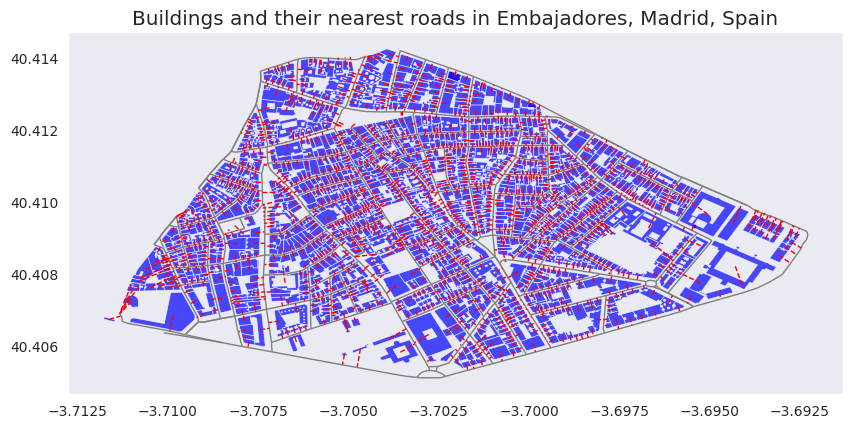

<ipython-input-56-b5896c2039f3>:55: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings['centroid'] = buildings.geometry.centroid


Name  \
element_type osmid                                                           
node         1517405732       Ilustre Colegio Oficial de Médicos de Madrid   
way          23571976                               Universidad Carlos III   
             29993106    Conservatorio Superior de Música Real Conserva...   
             48761409                              Mercado de San Fernando   
             48761444                                    La Casa Encendida   
...                                                                    ...   
relation     17528297                                        Not available   
             17528298                                        Not available   
             17528299                                        Not available   
             17528300                                        Not available   
             17528301                                        Not available   

                               Type                               Coordinates  \
element_type osmid                                                              
node         1517405732      public                   (-3.695436, 40.4093252)   
way          23571976    university  (-3.7098441297219447, 40.40686346113619)   
             29993106        school  (-3.694349095211361, 40.409371533121636)   
             48761409        retail  (-3.7036698120189575, 40.40767776458957)   
             48761444         civic  (-3.6998853444046813, 40.40608030424764)   
...                             ...                                       ...   
relation     17528297    apartments   (-3.705629757582116, 40.41251886572494)   
             17528298           yes  (-3.705607056586149, 40.412284135395396)   
             17528299           yes  (-3.7056131026464345, 40.41211553978457)   
             17528300        retail  (-3.7059190993384457, 40.41207822332761)   
             17528301           yes    (-3.706097596082042, 40.4119661985656)   

                         Distance to Road (m)  
element_type osmid                             
node         1517405732              0.000136  
way          23571976                0.000472  
             29993106                0.000635  
             48761409                0.000399  
             48761444                0.000258  
...                                       ...  
relation     17528297                0.000232  
             17528298                0.000308  
             17528299                0.000142  
             17528300                0.000187  
             17528301                0.000127  

[1775 rows x 4 columns]

In [ ]:
# Define the location
place_name = "Embajadores, Madrid, Spain"

# Retrieve the street network from the specified location
graph = ox.graph_from_place(place_name, network_type='drive')
nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)

# Retrieve all buildings
buildings = ox.features_from_place(place_name, {"building": True})

# Print the buildings to check the data
print(buildings[['name', 'building', 'geometry']].head())

# Convert buildings to the same CRS as graph
buildings = buildings.to_crs(edges.crs)

# Plot settings
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=1, edgecolor='grey')

# Plot buildings
buildings.plot(ax=ax, color='blue', alpha=0.7, markersize=5)

# Function to plot nearest edge line and calculate distance
def plot_nearest_edge(building, ax):
    # Calculate the centroid of the building if it's a polygon
    if building.geometry.type == 'Polygon':
        centroid = building.geometry.centroid
    else:
        centroid = building.geometry

    # Find the nearest edge to the centroid
    nearest_edge = ox.distance.nearest_edges(graph, centroid.x, centroid.y)
    # Extract nodes for this edge
    u, v, key = nearest_edge
    node_start = nodes.loc[u].geometry
    node_end = nodes.loc[v].geometry
    line = LineString([node_start, node_end])

    # Draw a line from building to the road
    line_to_edge = LineString([centroid, line.interpolate(line.project(centroid))])
    gpd.GeoSeries([line_to_edge]).plot(ax=ax, color='red', linestyle='--', linewidth=1)

    # Calculate and return the distance
    distance = centroid.distance(line.interpolate(line.project(centroid)))
    return distance

# Apply function to each building and collect distances
distances = buildings.apply(lambda x: plot_nearest_edge(x, ax), axis=1)

ax.set_title('Buildings and their nearest roads in ' + place_name)
plt.show()

# Combine buildings info and distances into a DataFrame
buildings['centroid'] = buildings.geometry.centroid
buildings_info = buildings[['name', 'building', 'centroid']].copy()
buildings_info['name'] = buildings_info['name'].fillna('Not available')
buildings_info['coordinates'] = buildings_info['centroid'].apply(lambda x: (x.x, x.y))
buildings_info['distance_to_road'] = distances

# Select columns to display
buildings_info = buildings_info[['name', 'building', 'coordinates', 'distance_to_road']]

# Convert to DataFrame and display
buildings_df = pd.DataFrame(buildings_info)
buildings_df = buildings_df.rename(columns={"name": "Name", "building": "Type", "coordinates": "Coordinates", "distance_to_road": "Distance to Road (m)"})

# Display the DataFrame
buildings_df


# Download JSON

In [ ]:
import json

# 转换为 JSON 格式
buildings_json = buildings_df.to_json(orient='records', indent=4)

# 保存到文件
json_filename = 'buildings_data.json'
with open(json_filename, 'w') as f:
    f.write(buildings_json)

print(f"Data has been written to {json_filename}")


Data has been written to buildings_data.json


In [ ]:
from google.colab import files

# 提供下载链接
files.download(json_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 使用 json 模块读取 JSON 文件

json_filename = 'buildings_data.json'
with open(json_filename, 'r') as f:
    data = json.load(f)

# 打印 JSON 数据
print(data)

# 使用 Pandas 读取 JSON 文件
import pandas as pd

buildings_df = pd.read_json(json_filename)

# 打印 DataFrame
print(buildings_df)


[{'Name': 'Ilustre Colegio Oficial de Médicos de Madrid', 'Type': 'public', 'Coordinates': [-3.695436, 40.4093252], 'Distance to Road (m)': 0.0001363501}, {'Name': 'Universidad Carlos III', 'Type': 'university', 'Coordinates': [-3.7098441297, 40.4068634611], 'Distance to Road (m)': 0.0004718054}, {'Name': 'Conservatorio Superior de Música Real Conservatorio Superior de Música de Madrid', 'Type': 'school', 'Coordinates': [-3.6943490952, 40.4093715331], 'Distance to Road (m)': 0.0006354001}, {'Name': 'Mercado de San Fernando', 'Type': 'retail', 'Coordinates': [-3.703669812, 40.4076777646], 'Distance to Road (m)': 0.0003989221}, {'Name': 'La Casa Encendida', 'Type': 'civic', 'Coordinates': [-3.6998853444, 40.4060803042], 'Distance to Road (m)': 0.0002579135}, {'Name': 'Biblioteca Pública Pedro Salinas', 'Type': 'yes', 'Coordinates': [-3.7109988096, 40.4072415408], 'Distance to Road (m)': 0.0004819059}, {'Name': 'Teatro Pavón', 'Type': 'public', 'Coordinates': [-3.7060904552, 40.4100899602

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


# Antcolony Test

In [3]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
import json
from google.colab import files

In [8]:
# 定義地點
place_name = "Embajadores, Madrid, Spain"

# 提取街道網絡
graph = ox.graph_from_place(place_name, network_type='drive')
nodes, edges = ox.graph_to_gdfs(graph, nodes=True, edges=True)

# 提取建築物
buildings = ox.features_from_place(place_name, {"building": True})

# 將建築物轉換到合適的投影坐標系
buildings = buildings.to_crs(epsg=3857)

# 獲取建築物的幾何中心點
building_centroids = buildings.geometry.centroid

buildings

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

source  \
element_type osmid               
node         1517405732    NaN   
way          23571976      NaN   
             29993106      NaN   
             48761409      NaN   
             48761444      NaN   
...                        ...   
relation     17528297      NaN   
             17528298      NaN   
             17528299      NaN   
             17528300      NaN   
             17528301      NaN   

                                                                  geometry  \
element_type osmid                                                           
node         1517405732                    POINT (-411374.054 4925603.813)   
way          23571976    POLYGON ((-412986.483 4925333.804, -412954.423...   
             29993106    POLYGON ((-411303.054 4925559.764, -411234.882...   
             48761409    POLYGON ((-412284.235 4925410.600, -412264.788...   
             48761444    POLYGON ((-411907.775 4925136.650, -411889.296...   
...                                                                    ...   
relation     17528297    POLYGON ((-412507.531 4926094.229, -412507.308...   
             17528298    POLYGON ((-412484.766 4926032.370, -412485.690...   
             17528299    POLYGON ((-412490.733 4926012.662, -412491.290...   
             17528300    POLYGON ((-412521.713 4925991.287, -412531.821...   
             17528301    POLYGON ((-412570.193 4925995.001, -412569.748...   

                              amenity addr:city addr:housenumber  \
element_type osmid                                                 
node         1517405732           NaN    Madrid               51   
way          23571976             NaN       NaN              NaN   
             29993106    music_school    Madrid               53   
             48761409     marketplace       NaN              NaN   
             48761444             NaN    Madrid                2   
...                               ...       ...              ...   
relation     17528297             NaN       NaN              NaN   
             17528298             NaN       NaN              NaN   
             17528299             NaN       NaN              NaN   
             17528300             NaN       NaN              NaN   
             17528301             NaN       NaN              NaN   

                        addr:postcode            addr:street  \
element_type osmid                                             
node         1517405732         28012  Calle de Santa Isabel   
way          23571976             NaN                    NaN   
             29993106           28012  Calle del Doctor Mata   
             48761409             NaN                    NaN   
             48761444           28012      Ronda de Valencia   
...                               ...                    ...   
relation     17528297             NaN                    NaN   
             17528298             NaN                    NaN   
             17528299             NaN                    NaN   
             17528300             NaN                    NaN   
             17528301             NaN                    NaN   

                                                                      name  \
element_type osmid                                                           
node         1517405732       Ilustre Colegio Oficial de Médicos de Madrid   
way          23571976                               Universidad Carlos III   
             29993106    Conservatorio Superior de Música Real Conserva...   
             48761409                              Mercado de San Fernando   
             48761444                                    La Casa Encendida   
...                                                                    ...   
relation     17528297                                                  NaN   
             17528298                                                  NaN   
             17528299                                               

In [10]:
coords = np.array([(point.x, point.y) for point in building_centroids])
distance_matrix = cdist(coords, coords, 'euclidean')

# 蚁群算法參數
ant_count = 10
generations = 100
alpha = 1.0
beta = 2.0
rho = 0.5
pheromone_evaporation_coefficient = 0.1
pheromone_constant = 1000.0

# 蚁群算法實現
class AntColony:
    def __init__(self, distance_matrix, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distance_matrix = distance_matrix
        self.pheromone = np.ones(self.distance_matrix.shape) / len(distance_matrix)
        self.all_inds = range(len(distance_matrix))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path
            self.pheromone *= self.decay
        return all_time_shortest_path

    def spread_pheronome(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distance_matrix[move]

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distance_matrix[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distance_matrix) - 1):
            move = self.pick_move(self.pheromone[prev], self.distance_matrix[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start))  # 返回起點
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0

        row = pheromone ** self.alpha * ((1.0 / np.maximum(dist, 1e-10)) ** self.beta)

        norm_row = row / row.sum()
        move = np.random.choice(self.all_inds, 1, p=norm_row)[0]
        return move

# 運行蚁群算法
ant_colony = AntColony(distance_matrix, ant_count, ant_count, generations, rho, alpha, beta)
shortest_path, length = ant_colony.run()


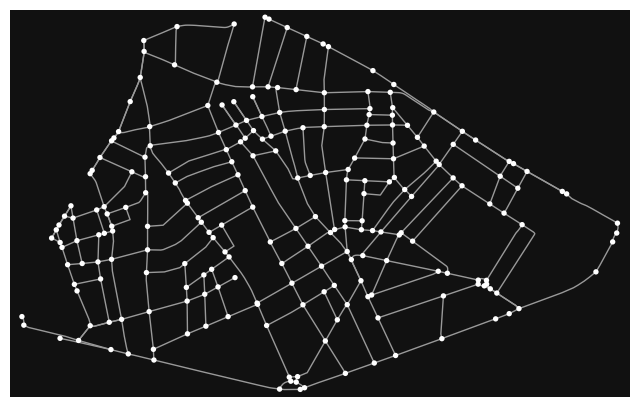

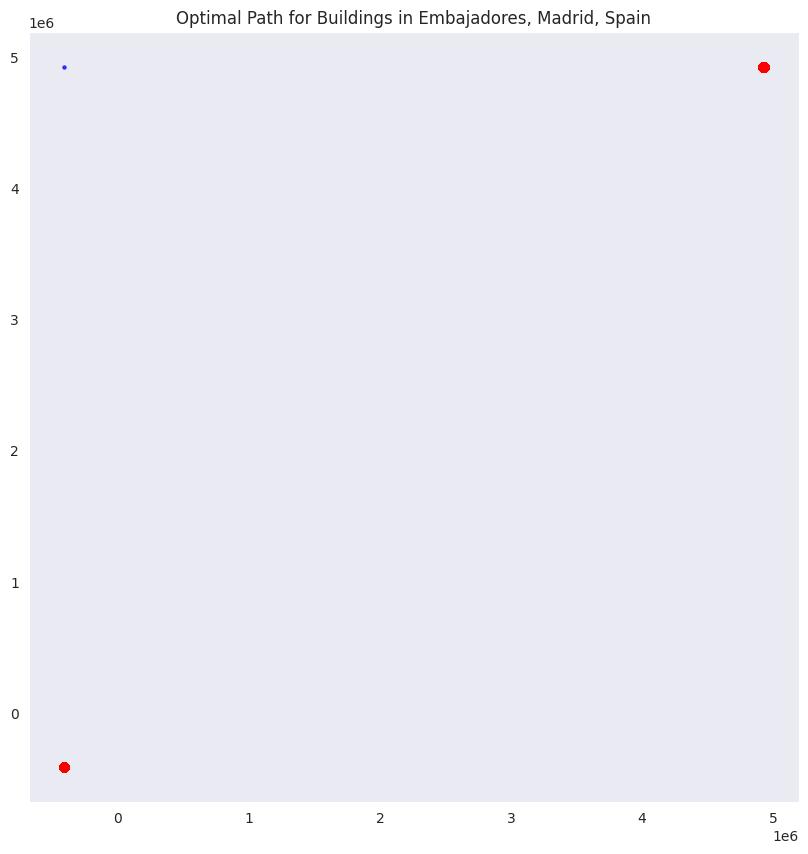

In [11]:
# Configure OSMnx
ox.settings.use_cache = True
ox.settings.log_console = True

# Define the location
place_name = "Embajadores, Madrid, Spain"
sns.set_style(style="dark")
figure, ax = osmnx.plot_graph(graph)

fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=1, edgecolor='grey')
buildings.plot(ax=ax, color='blue', alpha=0.7, markersize=5)

# 繪製最優路徑
path_coords = coords[shortest_path]
ax.plot(path_coords[:, 0], path_coords[:, 1], color='red', linestyle='-', linewidth=2, marker='o')

plt.title('Optimal Path for Buildings in ' + place_name)
plt.show()